In [10]:
import cv2
import csv
import glob
import pandas as pd
from sklearn.utils import shuffle

# Initialize the header
header = ["label"]
for i in range(0, 784):
    header.append("pixel" + str(i))

# Create the CSV file and write the header
with open('dataset.csv', 'a') as f:
    writer = csv.writer(f)
    writer.writerow(header)

# List of character folders
character_folders = ['A', 'BA', 'DA', 'E or I', 'GA', 'HA', 'KA', 'LA', 'MA', 'NAA', 'NGA', 'O or U', 'PA', 'RA', 'SA', 'TA', 'WA', 'YA']

# Loop through character folders
for character_folder in character_folders:
    dirList = glob.glob("baybayin_images/" + character_folder + "/*.jpg")

    # Get label from folder name
    label = character_folder

    for img_path in dirList:
        im = cv2.imread(img_path)
        im_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
        im_gray = cv2.GaussianBlur(im_gray, (11, 11), 0)
        # im_gray = cv2.GaussianBlur(im_gray, (15, 15), 0)
        roi = cv2.resize(im_gray, (28, 28), interpolation=cv2.INTER_AREA)

        data = []
        data.append(label)

        rows, cols = roi.shape

        # Threshold using Otsu's method
        _, thresholded = cv2.threshold(roi, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

        for i in range(rows):
            for j in range(cols):
                k = thresholded[i, j]
                data.append(k)

        # Print data for debugging
        print(data)

        with open('dataset.csv', 'a') as f:
            writer = csv.writer(f)
            writer.writerow(data)

# Load and shuffle the dataset
dataset = pd.read_csv('dataset.csv')
shuffled_dataset = shuffle(dataset)
print(shuffled_dataset)


['A', 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 0, 0, 0, 0, 0, 0, 0, 0, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 0, 0, 0, 0, 0, 0, 0, 0, 255, 255, 255, 255, 0, 0, 0, 0, 0, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 0, 0, 0, 0, 0, 0, 0, 0, 0, 255, 255, 255, 0, 0, 0, 0, 0, 0, 0, 255, 255, 255, 255, 255, 255, 255, 255, 255, 0, 0, 0, 0, 0, 0, 0, 0, 0, 255, 255, 255, 0, 0, 0, 0, 0, 0, 0, 255, 255, 255, 255, 255, 255, 255, 255, 0, 0, 0, 0, 0, 0, 0, 255, 255, 255, 255, 255, 255, 0, 0, 0, 0, 0, 0, 0, 0, 255, 255, 255, 255, 255, 255, 0, 0, 0, 0, 0, 0, 255, 255, 255, 255, 255, 255, 255, 255, 255, 0, 0, 0, 0, 0, 0, 0, 255, 255, 255, 255, 255, 255, 0, 0, 0, 0, 0, 255, 255, 255, 255, 255, 255, 255, 255, 255, 0, 0, 0, 0, 0, 0, 0, 0, 255, 255, 255, 255, 255, 255, 0, 0, 0, 0, 0, 255, 255, 255, 255, 255, 255, 255, 255, 255, 0, 0, 0, 0, 0, 0, 0, 0, 255, 255, 255, 255, 255, 255, 0, 

In [11]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

# Load and shuffle the dataset
dataset = pd.read_csv('dataset.csv')
shuffled_dataset = shuffle(dataset)

# Separate dependent and independent variables
X = shuffled_dataset.drop(["label"], axis=1)
Y = shuffled_dataset["label"]

A


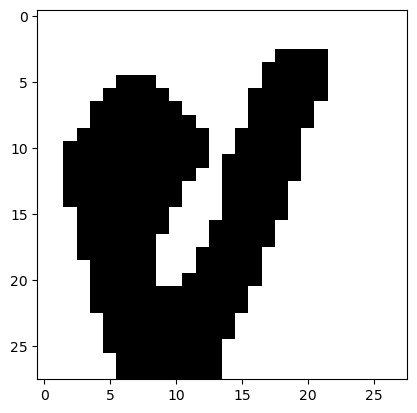

In [12]:
%matplotlib inline
idx = 22
img = X.loc[idx].values.reshape(28, 28)
print(Y[idx])
plt.imshow(img, cmap='gray')  # Use 'gray' colormap for grayscale images
plt.show()


In [13]:
# Train-Test split
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.2)

In [14]:
import joblib
from sklearn.svm import SVC

# Fit the model using SVC
classifier = SVC(kernel="linear", random_state=6)
classifier.fit(train_x, train_y)

# Save the model using joblib
joblib.dump(classifier, "model/baybayin_model")


['model/baybayin_model']

In [15]:
from sklearn import metrics

# Calculate accuracy
prediction = classifier.predict(test_x)
accuracy = metrics.accuracy_score(prediction, test_y)
print("Accuracy =", accuracy)


Accuracy = 0.9406474820143885


In [23]:
import joblib
import cv2
import numpy as np
import glob
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

# Load the trained model
model = joblib.load("model/baybayin_model")

# Folder containing test images
test_images_folder = "test_images/"

# Loop through test images
for img_path in glob.glob(test_images_folder + "*.jpg"):
    # Read the image
    im = cv2.imread(img_path)
    im_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
    im_gray = cv2.GaussianBlur(im_gray, (11, 11), 0)

    # Threshold the image
    _, im_th = cv2.threshold(im_gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    roi = cv2.resize(im_th, (28, 28), interpolation=cv2.INTER_AREA)

    rows, cols = roi.shape

    X = []

    # Fill the data array with pixels one by one.
    for i in range(rows):
        for j in range(cols):
            k = roi[i, j]
            X.append(k)

    # Make a prediction
    predictions = model.predict([X])
    predicted_label = predictions[0]

    # Display the result on the console
    print(f"Image: {img_path}, Prediction: {predicted_label}")


Image: test_images\aaaaaa.jpg, Prediction: A
Image: test_images\BAAA.jpg, Prediction: BA
Image: test_images\BAaAAA.jpg, Prediction: RA
Image: test_images\daaaaaaa.jpg, Prediction: DA
Image: test_images\EEEEEIIIII.jpg, Prediction: E or I
Image: test_images\HAAAAAAA.jpg, Prediction: HA
Image: test_images\KAAAAAA.jpg, Prediction: KA
Image: test_images\LAAAAA.jpg, Prediction: LA
Image: test_images\MAAAAA.jpg, Prediction: MA
Image: test_images\MAAAAAA.jpg, Prediction: A
Image: test_images\Ngaaaa (1).jpg, Prediction: NAA
Image: test_images\NGAAAA.jpg, Prediction: HA
Image: test_images\NGAAAAAAA.jpg, Prediction: RA
Image: test_images\OOOOUUUUU.jpg, Prediction: O or U
Image: test_images\saaaaa.jpg, Prediction: SA
Image: test_images\TAAAAA.jpg, Prediction: TA
Image: test_images\WAAAAA.jpg, Prediction: WA
Image: test_images\yaaa (1).jpg, Prediction: YA
Image: test_images\YAAA.jpg, Prediction: YA
Image: test_images\yaaaa.jpg, Prediction: PA
